In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import h5py
import os

In [2]:
my_sims_volume = 25**3  # in Mpc^3
my_sims_n_particles = (2**8)**3  # = 256^3

simulations_dict = {
    "Magneticum 4uhr": [68.2**3, 576**3],
    "Eagle": [100**3, 1504**3],
    "MassiveBlack-II": [142.7**3, 1792**3],
    "HorizonAGN": [142**3, 1024**3],
    "Romulus25": [25**3, 1100**3],
    "MUFASA": [73.5**3, 512**3],
    "TNG100": [110.7**3, 1820**3],
    "TNG300": [302.6**3, 2500**3],
    "FABLE": [58.9**3, 512**3],
    "Simba100": [147.1**3, 1024**3],
    "TNG50": [51.7**3, 2160**3],
    "NewHorizon": [16**3, 470**3],
    "FIREbox": [22.1**3, 1024**3],
    "MillenniumTNG": [740**3, 4320**3],
    "FLAMINGO": [1000**3, 3600**3],
    "CROCODILE": [72.5**3, 512**3],
}
color_map = {
    "TNG50": "#1f77b4",
    "TNG100": "#ff7f0e",
    "TNG300": "#2ca02c",
    "Eagle": "#9467bd",
    "Magneticum 4uhr": "#8c564b",
    "MassiveBlack-II": "#e377c2",
    "HorizonAGN": "#7f7f7f",
    "MUFASA": "#bcbd22",
    "Romulus25": "#17becf",
    "FABLE": "#9edae5",
    "Simba100": "#ff9896",
    "NewHorizon": "#c5b0d5",
    "FIREbox": "#aec7e8",
    "MillenniumTNG": "#8dd3c7",
    "FLAMINGO": "#fb8072",
    "CROCODILE": "#80b1d3",
}

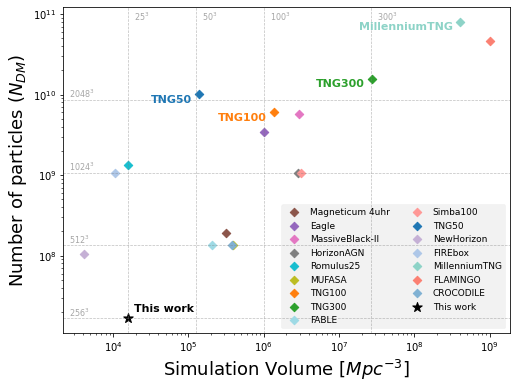

In [3]:
fig = plt.figure(figsize=(8, 6))
plt.yscale("log")
plt.xscale("log")

for name in simulations_dict.keys():
    plt.scatter(simulations_dict[name][0], simulations_dict[name][1], marker="D", label=name, color=color_map.get(name, 'gray'))
    
plt.scatter(my_sims_volume, my_sims_n_particles, marker="*", label="This work", s=100, c="black")
plt.text(
        my_sims_volume*1.2,
        my_sims_n_particles*1.2,
        "This work",
        color="black",
        fontsize=11,
        fontweight='bold')

highlight = ["TNG50", "TNG100", "TNG300", "MillenniumTNG"]
for h in highlight:
    plt.text(
        simulations_dict[h][0]*0.8,
        simulations_dict[h][1]*0.8,
        h,
        ha='right',
        color=color_map[h],
        fontsize=11,
        fontweight='bold'
    )

# --- Helper values ---
res_lines = [256**3, 512**3, 1024**3, 2048**3]  # particle resolutions
vol_lines = [25**3, 50**3, 100**3, 300**3]      # box volumes

# --- Draw grey dashed lines ---
for r in res_lines:
    plt.axhline(
        y=r, color='gray', linestyle='--', linewidth=0.7, alpha=0.5
    )
    # Optional label (on the right)
    plt.text(
        plt.xlim()[0]*1.2, r, fr"${int(np.cbrt(r))}^3$",
        color='gray', fontsize=8, ha='left', va='bottom', alpha=0.7
    )

for v in vol_lines:
    plt.axvline(
        x=v, color='gray', linestyle='--', linewidth=0.7, alpha=0.5
    )
    # Optional label (on the top)
    plt.text(
        v*1.2, plt.ylim()[1]*0.9, fr"${int(np.cbrt(v))}^3$",
        color='gray', fontsize=8, ha='left', va='top', alpha=0.7
    )
    
plt.ylabel(r"Number of particles ($N_{DM}$)", fontsize=18)
plt.xlabel(r'Simulation Volume [$Mpc^{-3}$]', fontsize=18)
plt.legend(loc="lower right",
           ncol=2,
           frameon=True,
           framealpha=0.1,
           facecolor="grey",
           fontsize=9,
           markerscale=1
          )
plt.savefig("plots/Comparison_other_simulations_n_particles_vs_volume.pdf", format="PDF")
plt.show()

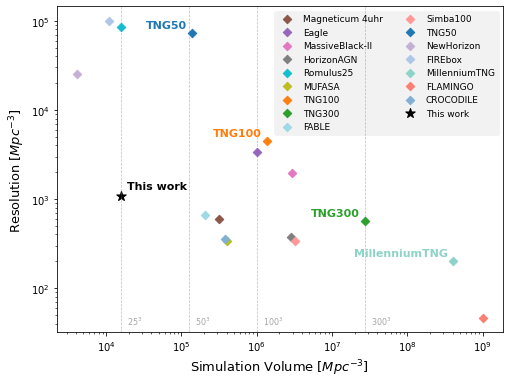

In [4]:
fig = plt.figure(figsize=(8, 6))
plt.yscale("log")
plt.xscale("log")

for name in simulations_dict.keys():
    plt.scatter(simulations_dict[name][0], simulations_dict[name][1]/simulations_dict[name][0], marker="D", label=name, color=color_map.get(name, 'gray'))
    
plt.scatter(my_sims_volume, my_sims_n_particles/my_sims_volume, marker="*", label="This work", s=100, c="black")
plt.text(
        my_sims_volume*1.2,
        my_sims_n_particles/my_sims_volume*1.2,
        "This work",
        color="black",
        fontsize=11,
        fontweight='bold')

highlight = ["TNG50", "TNG100", "TNG300", "MillenniumTNG"]
for h in highlight:
    plt.text(
        simulations_dict[h][0]*0.85,
        simulations_dict[h][1]/simulations_dict[h][0]*1.15,
        h,
        ha='right',
        color=color_map[h],
        fontsize=11,
        fontweight='bold'
    )

# --- Helper values ---
vol_lines = [25**3, 50**3, 100**3, 300**3]      # box volumes


for v in vol_lines:
    plt.axvline(
        x=v, color='gray', linestyle='--', linewidth=0.7, alpha=0.5
    )
    # Optional label (on the top)
    plt.text(
        v*1.2, plt.ylim()[0]*1.15, fr"${int(np.cbrt(v))}^3$",
        color='gray', fontsize=8, ha='left', va='bottom', alpha=0.7
    )
    
plt.ylabel(r"Resolution [$Mpc^{-3}$]", fontsize=13)
plt.xlabel(r'Simulation Volume [$Mpc^{-3}$]', fontsize=13)
plt.legend(loc="upper right",
           ncol=2,
           frameon=True,
           framealpha=0.1,
           facecolor="grey",
           fontsize=9,
           markerscale=1,
          )
plt.savefig("plots/Comparison_other_simulations_resolution_vs_volume.pdf", format="PDF")
plt.show()

# Comparison with similar suits

In [9]:
simulations_dict = {
    "CAMELS": [25**3, 1.27e7, 1092],  # source: https://arxiv.org/pdf/2010.00619 (first CAMELS paper)
    "THESAN": [95.5**3, 4.66e6, 8],  # source: https://arxiv.org/pdf/2110.00584
    "DREAMS": [25**3 ,2.6e8, 1000],  # source: https://arxiv.org/pdf/2405.00766
    "ANTILLES" : [100**3, 1.09e9, 400],  # source: https://arxiv.org/pdf/2305.09710
    "BAHAMAS": [400**3, 7.66e8, 4],  # source: https://arxiv.org/pdf/1603.02702
}
sheerwood_relics = { # TODO: doublecheck these values or talk to Dylan about them - source: https://arxiv.org/pdf/2207.13098
    "var1": [40**3, 9.97e4, 15],
    "var2": [20**3, 9.97e4, 120],
    "var3": [10**3, 1.25e4, 25],
    "var5": [40**3, 7.97e5, 76],
    "var6": [10**3, 9.97e4, 25]
}

color_map = {
    "CAMELS": "#1f77b4",
    "THESAN": "#ff7f0e",
    "DREAMS": "#2ca02c",
    "ANTILLES": "#9467bd",
    "BAHAMAS": "#8c564b",
    "Sheerwood-Relics": "#e377c2",
    #"HorizonAGN": "#7f7f7f",
    #"MUFASA": "#bcbd22",
    #"Romulus25": "#17becf",
    #"FABLE": "#9edae5",
    #"Simba100": "#ff9896",
    #"NewHorizon": "#c5b0d5",
    #"FIREbox": "#aec7e8",
    #"MillenniumTNG": "#8dd3c7",
    #"FLAMINGO": "#fb8072",
    #"CROCODILE": "#80b1d3",
}

# TODO: include The Sherwood-Relics simulations (https://arxiv.org/pdf/2207.13098) - but how? :/
#       also THE QUIJOTE SIMULATIONS (https://arxiv.org/pdf/1909.05273) with 44000 simulations?!

In [6]:
# sort for box size
simulations_dict = dict(sorted(simulations_dict.items(), key=lambda d: d[1][0]))
print(simulations_dict)

{'CAMELS': [15625, 12700000.0, 1092], 'DREAMS': [15625, 260000000.0, 1000], 'THESAN': [870983.875, 4660000.0, 8], 'ANTILLES': [1000000, 1090000000.0, 400]}


Attributes in /Header:
BoxSize: 25000.0
Composition_vector_length: 0
Flag_Cooling: 1
Flag_DoublePrecision: 0
Flag_Feedback: 1
Flag_Metals: 0
Flag_Sfr: 1
Flag_StellarAge: 0
Git_commit: b'2a814e756e7b47c056b5a26c824f2d90ef1a0738'
Git_date: b'Tue Sep 2 12:42:11 2025 +0200'
HubbleParam: 0.5689
MassTable: [0.         0.0099378  0.         0.00246313 0.         0.        ]
NumFilesPerSnapshot: 8
NumPart_ThisFile: [1990255 2099376       0 2065456   79100     236]
NumPart_Total: [15917604 16777216        0 16777216   631835     1797]
NumPart_Total_HighWord: [0 0 0 0 0 0]
Omega0: 0.4798
OmegaBaryon: 0.0953
OmegaLambda: 0.5202
Redshift: 2.220446049250313e-16
Time: 0.9999999999999998
UnitLength_in_cm: 3.085678e+21
UnitMass_in_g: 1.989e+43
UnitVelocity_in_cm_per_s: 100000.0
----------------
[33422290. 27469252. 27873754. ... 24724794. 23743022. 24745684.]


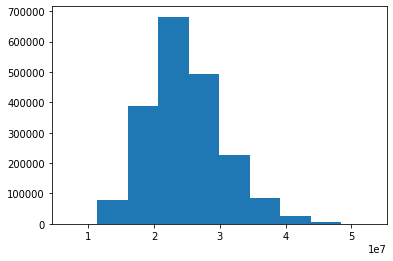

Mean mass of cell: 24830568.0
BoxSize: 25.0


In [7]:
output_dir = f"/u/jerbo/my_ptmp/L25n256_suite/gridpoint0/"
snapN = 5
snapdir = glob.glob(output_dir+f"snapdir_*{snapN}")[0]
snap_file = os.listdir(snapdir)[0]
file_path = snapdir+"/"+snap_file
with h5py.File(file_path, "r") as f:
    header = f['Header']
    print("Attributes in /Header:")
    for key, val in header.attrs.items():
        print(f"{key}: {val}")
    
    print("----------------")
    masses_list = f['PartType0/Masses'][:]*1e10  # in Solar Masses/h
    print(masses_list)
    
    boxsize = header.attrs['BoxSize']/1e3  # in Mpc

fig = plt.figure()
plt.hist(masses_list)
plt.show()

mean_masses = masses_list.mean()
print("Mean mass of cell:", mean_masses)
print("BoxSize:", boxsize)

my_sims = [boxsize**3, mean_masses, 50]

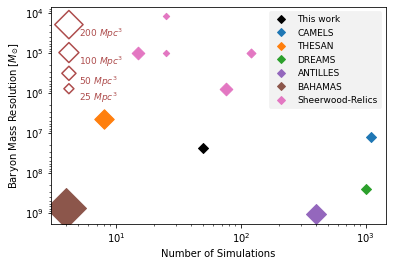

In [10]:
from matplotlib.lines import Line2D
fig = plt.figure()
plt.yscale("log")
plt.xscale("log")

plt.scatter(my_sims[2], my_sims[1], s=np.cbrt(my_sims[0])*2, marker="D", c="black", label="This work")
handles = [Line2D([0], [0], linestyle="None", marker='D', color="black", label="This work", markersize=6)]

for name in simulations_dict.keys():
    plt.scatter(simulations_dict[name][2], simulations_dict[name][1],
                s=np.cbrt(simulations_dict[name][0])*2, marker="D",
                color=color_map.get(name, 'gray'))
    handles.append(Line2D([0], [0], linestyle="None", marker='D', color=color_map.get(name, 'gray'),
                          label=name, markersize=6))
    
for var in sheerwood_relics.keys():
    plt.scatter(sheerwood_relics[var][2], sheerwood_relics[var][1],
                s=np.cbrt(sheerwood_relics[var][0])*2, marker="D",
                color=color_map.get("Sheerwood-Relics", 'gray'))

handles.append(Line2D([0], [0], linestyle="None", marker='D', color=color_map.get("Sheerwood-Relics", 'gray'),
               label="Sheerwood-Relics", markersize=6))

plt.gca().invert_yaxis()
plt.xlabel("Number of Simulations")
plt.ylabel(r"Baryon Mass Resolution [$M_{\odot}$]")

# Creating Visual Guide for Sizes
sizes = [25, 50, 100, 200]
outline_x = 4.2e0  # Adjust as needed based on your plot scale
outlines_y = [8e5, 3.3e5, 1e5, 2e4]  # Starting Y value, adjust based on your data range

for y_pos, size in zip(outlines_y, sizes):
    plt.scatter(outline_x, y_pos,
                s=size*2,
                marker='D',
                facecolors='none',
                edgecolors='darkred',
                linewidths=1.5,
                alpha=0.7,
                zorder=10)

    plt.text(outline_x * 1.2, y_pos * 1.6, fr"{size} $Mpc^3$", va='center', fontsize=9, color="darkred", alpha=0.7)


plt.legend(handles=handles,
           loc="upper right",
           ncol=1,
           frameon=True,
           framealpha=0.1,
           facecolor="grey",
           fontsize=9)

plt.savefig("plots/Comparison_other_suits.pdf", format="PDF")
plt.show()